<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sklearn-lvq

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d
from sklearn.mixture import GaussianMixture
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm
from sklearn_lvq import GlvqModel
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import math
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Para acomodar la información si viene por minuto y en registros, 
#df = pd.read_csv('rg1.csv')
## aqui agrupamos por minuto
#df_grouped_multiple = df.groupby(['YEAR','MONTH','DAY','HOUR']).agg({'RG1': ['mean']})
#df_grouped_multiple.columns = ['rg1_mean']
#df_grouped_multiple = df_grouped_multiple.reset_index()
## aquí pivoteamos
#df1 = df_grouped_multiple.pivot(index=['YEAR','MONTH','DAY'], columns='HOUR', values='rg1_mean').dropna()
#print(df1) #df1.to_csv('res.csv')
#df1.columns = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']]

In [4]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,dot_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    for p in serie_:
        if dot_== True:
           plt.plot(p,alpha=0.4, linestyle='dashed', linewidth=3)
        else:
           plt.plot(p,alpha=0.4)                
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [5]:
def scatterplot(X_,Y_,tags_,centers_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    for k in centers_:
        x = k[7]; y = k[8]
        plt.plot(x,y,"o",color="red",)
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('hora 7',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('hora 8',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, c=tags_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [6]:
def print_patrones(list_series,list_categorias,list_patrones,title_,namefile_): 
    cat = np.unique(list_categorias)
    n = math.ceil(pow(n_clusters, 0.5))
    fig, axs = plt.subplots(n, n, figsize=(15,14))
    row=0; col=0
    for c in cat:
        j = 0
        for g in list_categorias:    
            if c == g:
                axs[row,col].plot(list_series[j],alpha=0.5)
                axs[row,col].set_title(title_+str(c),color = LETRASNARA)             
            j = j + 1

        axs[row,col].spines['bottom'].set_color(LETRASNARA)
        axs[row,col].spines['top'   ].set_color(LETRASNARA) 
        axs[row,col].spines['right' ].set_color(LETRASNARA)
        axs[row,col].spines['left'  ].set_color(LETRASNARA)
        axs[row,col].tick_params(colors = LETRASNARA, which='both')

        if len(list_patrones) != 0:
            axs[row, col].plot(list_patrones[c],alpha=0.7,color='red',linestyle='dashed',linewidth=4)

            #axs[row,col].spines['bottom'].set_color(LETRASNARA)
            #axs[row,col].spines['top'   ].set_color(LETRASNARA) 
            #axs[row,col].spines['right' ].set_color(LETRASNARA)
            #axs[row,col].spines['left'  ].set_color(LETRASNARA)
            #axs[row,col].tick_params(colors = LETRASNARA, which='both')
            
        col = col + 1
        if col == n:
            col = 0
            row = row + 1  
    plt.savefig(namefile_, transparent=True)
    plt.show()

# **Leemos datos fotovoltaicos**

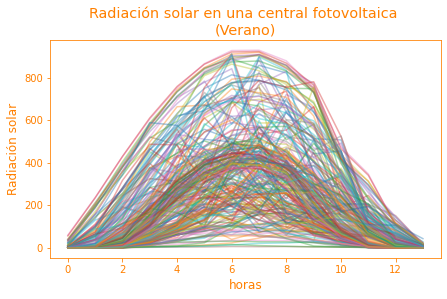

In [7]:
df = pd.read_csv('rg1_horas.csv')

##totales por dia ('SUMA'), diferenciados de primer orden ('dSUMA'), de segundo orden ('ddSUMA')
x_total   = df[['SUMA']].to_numpy()
dx_total  = df[['dSUMA']].to_numpy()
ddx_total = df[['ddSUMA']].to_numpy()

## Por estación del año
df_invierno = df[(df.MONTH==11)|(df.MONTH==12)|(df.MONTH==1)|(df.MONTH==2)|(df.MONTH==3)|(df.MONTH==4)]
df_verano   = df[(df.MONTH==5) |(df.MONTH==6) |(df.MONTH==7)|(df.MONTH==8)|(df.MONTH==9)|(df.MONTH==10)]
df          = df_invierno
horas_verano   = ['4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
horas_invierno =     ['5','6','7','8','9','10','11','12','13','14','15','16','17','18']
X = df[horas_invierno].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X  = sc.fit_transform(X)
#y  = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.3)

print_serie(X_train,'Radiación solar en una central fotovoltaica \n(Verano)','Radiación solar','horas',False,'fig_t13_all')

# **K-means**


y_kmeans [12  7 13  5  0  4  2 13 13  3 13 12  4 13 13  0  2  5 12 14  9  5 13 14
  5 15  6  1 12 14  4 15  2  5 13  2  2  5  4  4  2  2  9 10 12  6 14  0
 15  2  1 10  7  5 12 12 13  9  1  2  5 13  1  4 12  0  1  9  2 10  1  9
  2  0 10  4  4  5 12 10  5  9 11 10  1  5  2  7  1  1  7 13 10  7 11 13
 13 11  7 11 11  2  7  3  7  4  2  3] 108
y_kmeans_train [ 0 12  5 11  1  9 12  2  2  4  4  3  4  2  2  2 13  0 12 12  9  4 15 10
  5 15  5  8  2  2  3  4  1  6  4  4 13  5  9  7  0  4 13  3 10  9  4 12
 10 12  5 12  9  0 15 11  7  5  5 12 15  4  0  2  0  7  4 13  2  1  5 12
  4  2 13  4  2 13  2  9  5  2 13  6  1  7  6  2 11  5  6  1 10  2 15  7
  9 14 11  6 14  1  2  2  3  7  1 12  7  3  2  4  4  0  1 13 12  0 14 12
 12  2  6  1  2 11 13  0  4  4 12  0  1  5 15  6  4  4  1 12  3  5 14 14
 13  2 13 12  2 10  5 12  0  6  5 14  1 13  7  8  5  9  8  2 10 11 12 12
 15 11 12  4  4 10 12  0  5  2  0  4 13  6  0 12  8 12 11 15 13 11  7  2
  2  7  2  5  4  0  1  4  9  2 12  5  3  7 14  5  4  5  6 

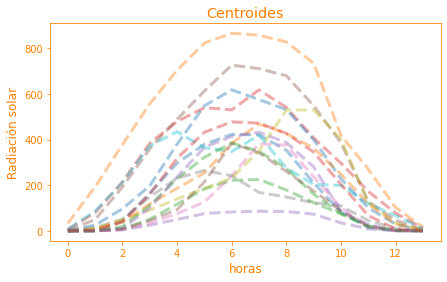

In [8]:
n_clusters = 16
k_means = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, n_init=10) # una variante MiniBatchKMeans, KMeans
k_means = k_means.fit(X_train)
values  = k_means.cluster_centers_.squeeze()
labels  = k_means.labels_
kmeans_centers_= k_means.cluster_centers_
#print('Centroides', centers_)
#print('Exactitud:', k_means.score(X_test))
y_kmeans = k_means.predict(X_test)
y_kmeans_train = k_means.predict(X_train)
print('y_kmeans' , y_kmeans,len(y_kmeans ))
print('y_kmeans_train' , y_kmeans_train,len(y_kmeans_train))
print_serie(kmeans_centers_,'Centroides','Radiación solar','horas',True,'fig_t13_centroids_kmeans')
#scatterplot(X_train[:,4],X_train[:,8],labels,centers_,'Radiación solar \n K-means \n(entrenamiento)','fig_t13_train')

X_train (kmeans)


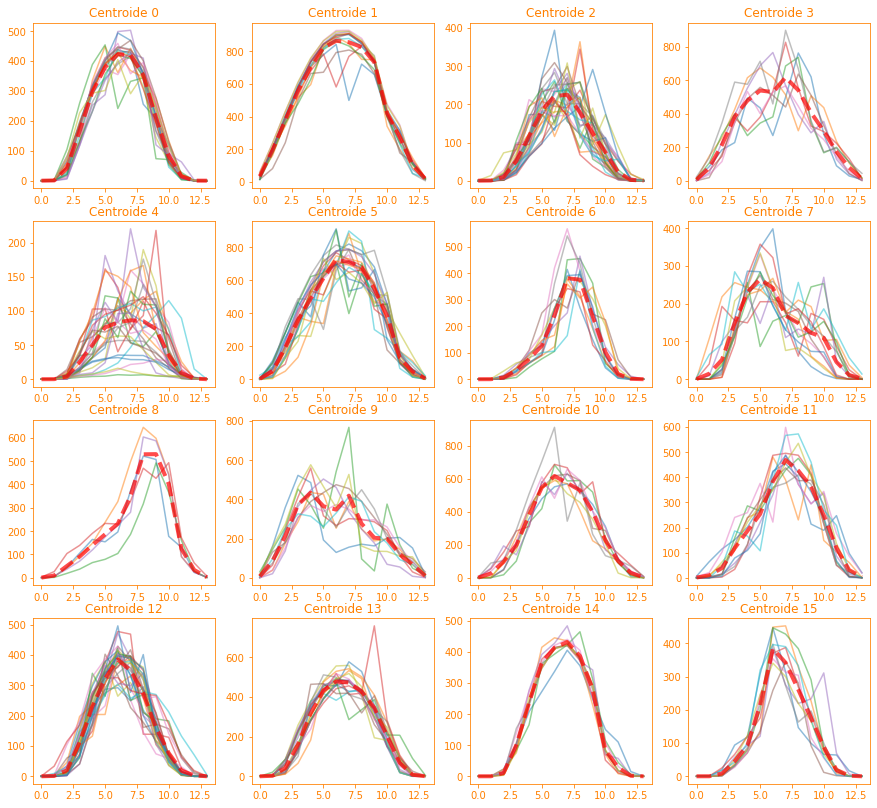

In [9]:
print('X_train (kmeans)')
print_patrones(list_series=X_train,list_categorias=y_kmeans_train,list_patrones=kmeans_centers_,title_='Centroide ',namefile_='fig_t13_kmeans_train')

X_test (kmeans)


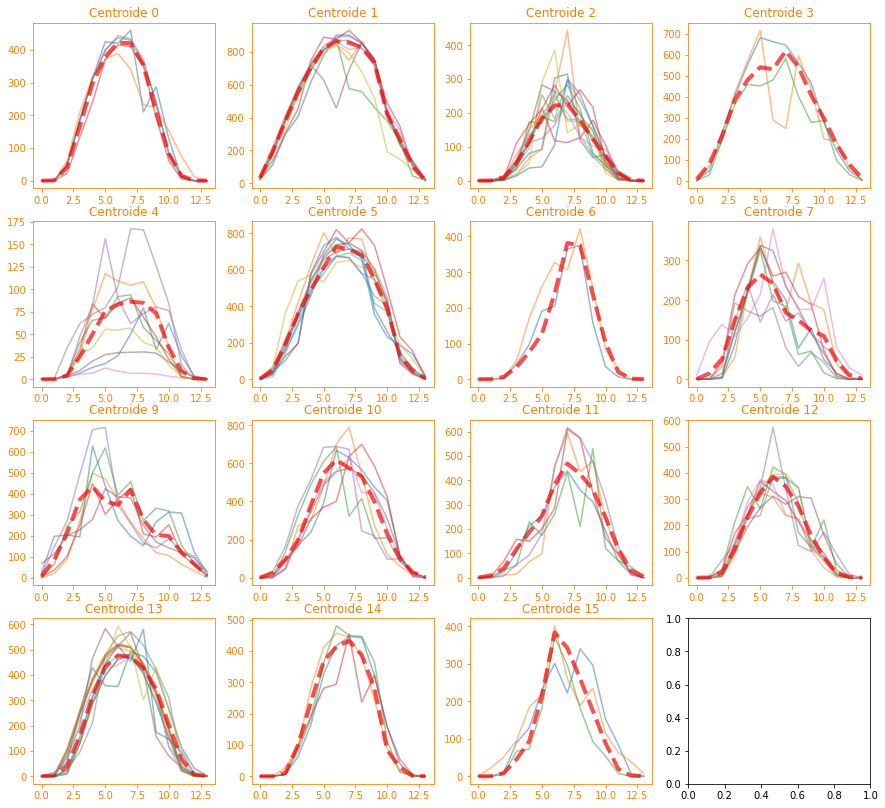

In [10]:
print('X_test (kmeans)')
print_patrones(list_series=X_test,list_categorias=y_kmeans,list_patrones=kmeans_centers_,title_='Centroide ',namefile_='fig_t13_kmeans_test')

# **KNN from scratch**


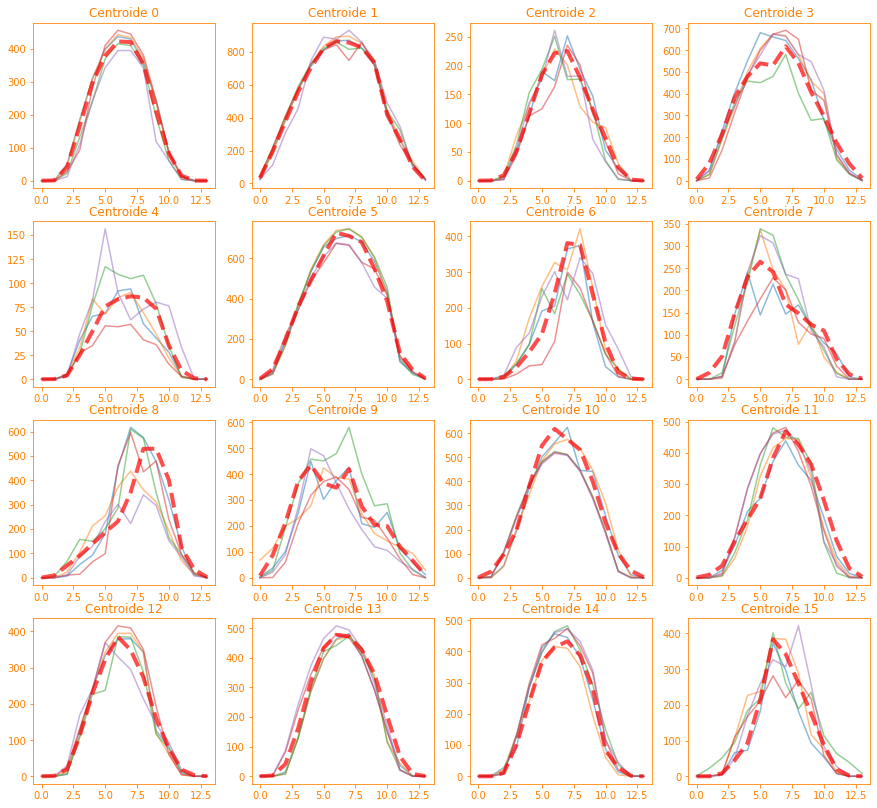

In [11]:
#https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
def euclidean(neig1, neig2):
	  distance = 0.0
	  for i in range(len(neig1)):
		    distance += (neig1[i] - neig2[i])**2
	  return sqrt(distance)
   
dataset = [[2.7810836,2.550537003,0],	[1.465489372,2.362125076,0],	[3.396561688,4.400293529,0],	[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],	[7.627531214,2.759262235,1],	[5.332441248,2.088626775,1],	[6.922596716,1.77106367,1],	[8.675418651,-0.242068655,1],[7.673756466,3.508563011,1]]

row0 = dataset[0]
#for row in dataset:
#	  distance = euclidean(row0, row)
#	  print(distance)
	 
## Encuentra los vecinos más cercanos
def get_neighbors(train, test_row, num_neighbors):
  
    distances = list()

    for train_row in train:
        dist = euclidean(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])

    neighbors = list()

    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	  neighbors = get_neighbors(train, test_row, num_neighbors)
	  output_values = [row[-1] for row in neighbors]
	  prediction = max(set(output_values), key=output_values.count)
	  return prediction

prediction = predict_classification(dataset, dataset[0], 3)

#neighbors = get_neighbors(dataset, dataset[0], 5)
serie = []
cat   = []
i     = 0 
for center in kmeans_centers_:
    neighbors = get_neighbors(X_test, center, 5)
    for neighbor in neighbors:
        serie.append(neighbor)
        cat.append(i)
    i = i  + 1
print_patrones(list_series=serie,list_categorias=cat,list_patrones=kmeans_centers_,title_='Centroide ',namefile_='fig_t13_knn_scratch')

# **KNN de aportaciones hidrológicas en presas**

position [623, 548, 609, 488, 236, 297, 716, 200, 633, 600]


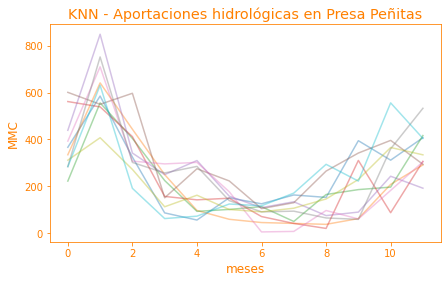

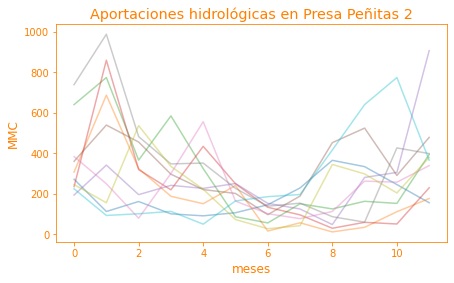

In [12]:
df = pd.read_csv('Aportaciones_Embalses.csv')
apor = df['PEA'].to_numpy()
v = 12                    ## tamanio de la ventana (un año)
k = 10                    ## número de vecinos a buscar k
vecindario    = []        ## vecindario completo
vecindario_b  = [] 
distances     = []
n             = len(apor) ## longitud total de la serie
tol           = 0.6       ## tolerancia de tamaño de ventanas para seleccion de vecinos
n             = n - 12    ## datos de test (comentar esta linea!!!)

#print(apor[n-v:n],'**')  ## imprime el prototipo
## Se calcula la distancia euclidiana entre todos los vecinos.
for i in range(n-2*v+1):
    dist = euclidean(apor[n-v:n],apor[i:i+v])
    distances.append((i, dist))
    #print(apor[n-v:n],apor[i:i+v],i, dist)

## Se ordena el vecindario por distancia de menor a mayor y se guardan las posiciones.
distances.sort(key=lambda tup: tup[1])
neighbors  = []
neighbors2 = []
position   = []

## Se escogen los k vecinos mas cercanos y guardamos las posiciones.
i = 0
for pos, dis in distances:
    #print(apor[pos:pos+v],dis,pos)

    if i==0:      
        position.append(pos)   
        neighbors.append(apor[pos:pos+v])
        neighbors2.append(apor[pos+v:pos+2*v])
    else:
        bandera = True
        for p in position:
            if (abs(pos - p) < tol*v):
                bandera = False
                i = i - 1
                break
        if bandera == True:
            #print(pos,p)
            position.append(pos)   
            neighbors.append(apor[pos:pos+v])
            neighbors2.append(apor[pos+v:pos+2*v])
            bandera = False
    i = i + 1
    if i == k:
        break

## Convertimos a numpy.  
neighbors  = np.array(neighbors)
neighbors2 = np.array(neighbors2)
print('position',position)    ## posición de los k vecinos mas cercanos.
#print(neighbors)   ## k vecinos mas cercanos.
#print(neighbors2)  ## ventana de datos posterior a los k vecinos mas cercanos.

print_serie(neighbors, 'KNN - Aportaciones hidrológicas en Presa Peñitas','MMC','meses', False,'fig_t13_aportaciones')
print_serie(neighbors2,'Aportaciones hidrológicas en Presa Peñitas 2','MMC','meses', False,'fig_t13_aportaciones2')

In [13]:
X   = sm.add_constant(neighbors.T)
X_2 = sm.add_constant(neighbors2.T)
y   = apor[n-v:n]
y_real = apor[n-v+12:n+12]

model   = sm.OLS(y, X)
results = model.fit()
result_prediction = results.predict(X_2)
#print(result_prediction)
#print(results.summary())

## Se ordenan los valores p y se selecciona el más grande.
i = 0
pvalues = []
for pi in results.pvalues:
    pvalues.append((i,pi))
    i = i + 1
pvalues.sort(key=lambda tup: tup[1])
(i, pi) = pvalues[0]

## Proceso de stepwise
while pi > 0.05:
    print('Retiramos regresor X' + str(i))
    X   = np.delete(arr=X,   obj=i, axis=1)
    X_2 = np.delete(arr=X_2, obj=i, axis=1)
    model   = sm.OLS(y, X)
    results = model.fit()

    ## Se ordenan los valores p y se selecciona el más grande
    i = 0
    pvalues = []
    for pi in results.pvalues:
        pvalues.append((i,pi))
        i = i + 1
    pvalues.sort(key=lambda tup: tup[1])
    (i, pi) = pvalues[0]
    print(pi)

result_prediction = results.predict(X)
print(result_prediction)
print(results.summary())

# Exactitud del modelo
print('Test MAE OLS + stepwise= ', mean_absolute_error(y,y_real))

Retiramos regresor X8
0.5544832829193845
Retiramos regresor X2
0.2104646454083143
Retiramos regresor X0
0.2704796481080383
Retiramos regresor X7
0.4128298391624295
Retiramos regresor X0
0.22872559749863908
Retiramos regresor X1
0.25302812874300057
Retiramos regresor X0
0.12772465007955286
Retiramos regresor X3
0.035074579047985145
[499.57885552 670.37588503 449.42131265 211.06037366 288.58066419
 190.58834313  83.49578515 103.26843778 167.30642308 199.9637757
 298.42921458 261.758269  ]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              38.44
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    1.85e-05
Time:                        20:14:40   Log-Likelihood:             

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


# **LVQ**

In [14]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_glvq.html#sphx-glr-auto-examples-plot-glvq-py

print('GLVQ')
glvq = GlvqModel(prototypes_per_class=1, initial_prototypes=None)
glvq.fit(X_train,labels)
glvq_pred = glvq.predict(X_test)
glvq_pred_train = glvq.predict(X_train)
print('glvq_pred',glvq_pred)
print('glvq_pred_train', glvq_pred_train)
print('classification accuracy:', (glvq.score(X_test, glvq_pred)))
plt.show()

GLVQ
glvq_pred [12  7 13  5  0  4  2 13 13  5 13 12  4 13 10 12  2  5 12 14  9  5 13 14
  5  6  6  1 12 14  4 12  2  5 13  2  2  5  4  4  2  2  9 10 12 14 12  0
 15  2  1 10 12  5 12 12 13  9  1  2  5 13  1  4 12  0  1  9  2 10  1  9
  6  0 11  4  4  5 12 10  5  9 11 10  1  5  2  7  1  1 12 13 10  7 11 13
 13 11 12 11 11  2  7  3  7  4  2  3]
glvq_pred_train [ 0 12  5 11  1  9 12  2  2  4  4  3  4  2  2  2 13  0 12 12  9  4 12 10
  5 15  5  8  2  2  3  4  1  6  4  4 13  5  9  7  0  4 13  3 10  9  4 12
 10 12  5 12  9  0 15 11  7  5  5 12 15  4  0  2  0  7  4 13  2  1  5 12
  4  2 13  4  2 13  2  9  5  2 13  6  1  7  6  2 11  5  6  1 10  2 15  7
  9 12 11  6 14  1  2  2  3  7  1 12  7  5  2  4  4  0  1 13 12 12 14 12
 12  2  6  1  2 11 13  0  4  4 12  0  1  5  2  6  4  4  1 12  3  5 14 14
 13  2 13 12  2 10  5 12  0  6  5 14  1 13  2  8  5  9  8  2 10 11 12 12
 15 11 12  4  4 10 12  0  5  2  0  4 13  6  0 12  8 12 11 15 13 11  7  2
  2  7  2  5  4  0  1  4  9  2 12  5  3  7 14  5  4  5 

X_train (LVQ)


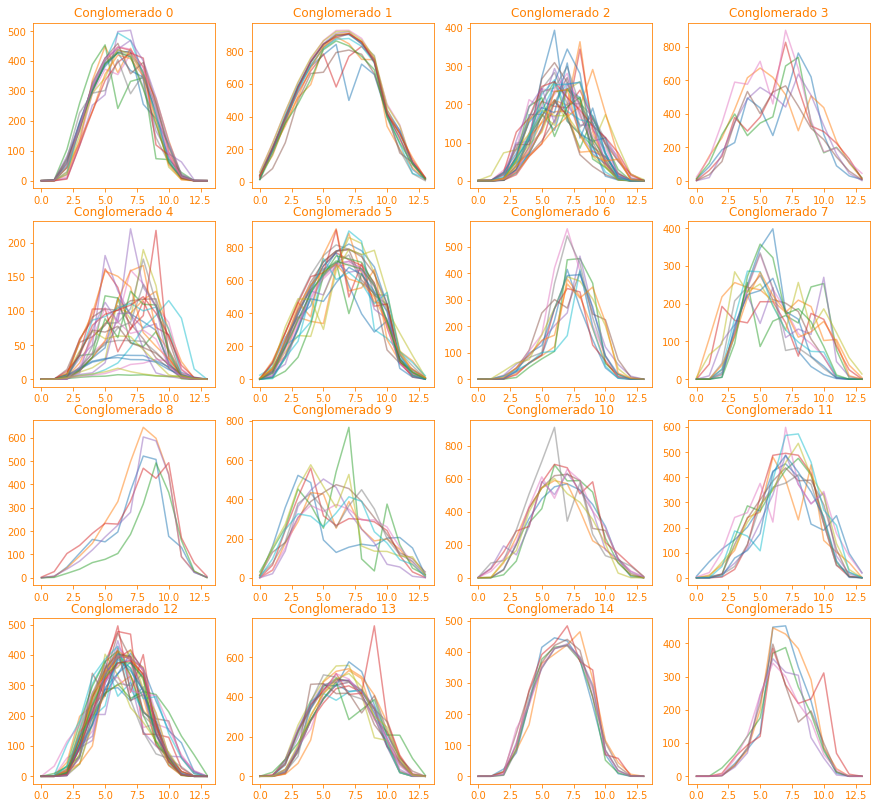

In [15]:
print('X_train (LVQ)')
print_patrones(list_series=X_train,list_categorias=glvq_pred_train,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_lvq_train')

X_test (LVQ)


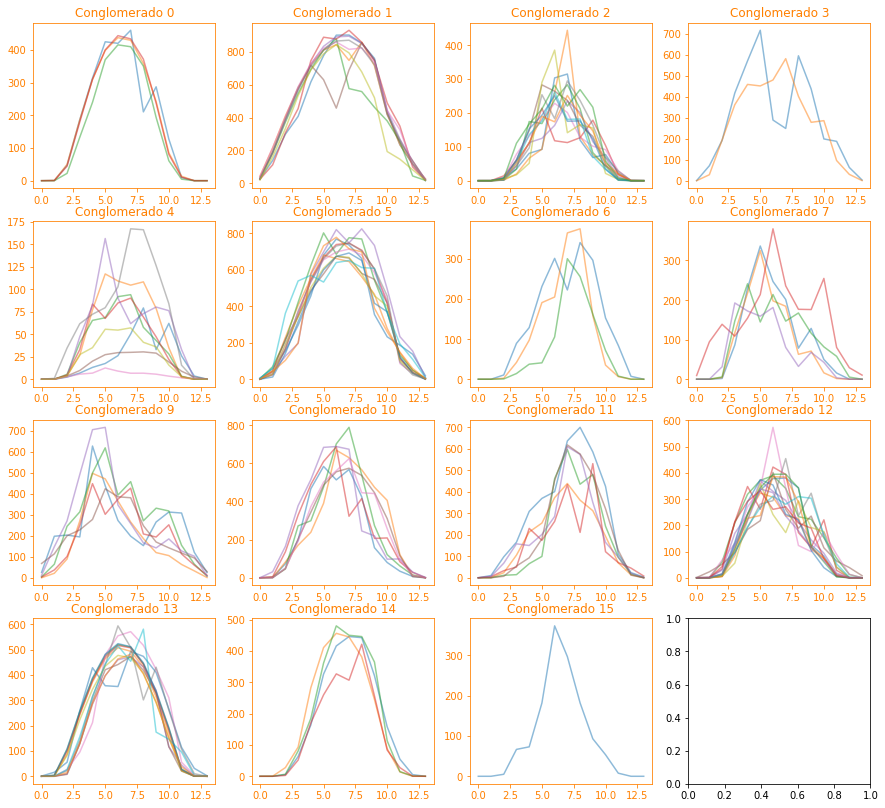

In [16]:
print('X_test (LVQ)')
print_patrones(list_series=X_test,list_categorias=glvq_pred,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_lvq_test')

# **GaussianMixture**

In [17]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
gm = GaussianMixture(n_components=n_clusters, init_params='kmeans',covariance_type='full') #full, tied, diag, spherical
gm.fit(X_train)
gm_pred_train = gm.predict(X_train)
gm_pred       = gm.predict(X_test)

print('classification accuracy train:', gm.score(X_train, gm_pred_train))
print('classification accuracy:', gm.score(X_test, gm_pred))

print('gm_pred',gm_pred)
print('gm_pred_train', gm_pred_train)

classification accuracy train: -32.181193316795266
classification accuracy: -16023922.51204544
gm_pred [14 14  2  2 14  2 14  0  0  2  0 14  2  0 14 14 14  0 14 14 15  0 14 14
 15 14 14  4 14 14  2  2 14  0 14 14 14  0  2 12 14 14  0  0 14 14 14 14
 14 14  4  0 14  0 14 14 14  2  4 14  0  0  4  2 14 14 10  2 14  0  4  0
 14 14  2  2 14  2 14  0  0  4 14  0  4  0 14 14  4  2 14 14 14 14 14  0
 14  2 14  0 14 14  4  0 14  2 14  0]
gm_pred_train [14 14  1 15  1 11 14 14 12  2  2  4  2 14  7  7  0  0 14 14  8  2  3  4
 13  3  9  5 12  7  9  2 10 12  2  2  0  1 11 14  8  2  0 13  4 11  2 14
  6 14  1 14  8 14 14  0  8  1  6 14  3  2  0  3 14  7  2  0  2 10  1 14
  2 14  0  2  7  0 14  4  6 14  0 12 10  7 12 12 15  6 12 10  6 14  3  7
  8 15 15 12 14  1  3 14 13 14 10 14 14  9 14  2  2 14 10  0 14 14 14 14
 14  7 15 10 14 15  0 14  2  2 14 14 10  9  3 14  2  2 10 14  9  6 14  0
  0 12  4 14 14  4  9 14  0 14  6 14 10  4  7  5  1  8  5 14  4 15 14 14
  3 15  3  2  2  6 14 14  6 14 14  2  8 15

X_train (GaussianMixture)


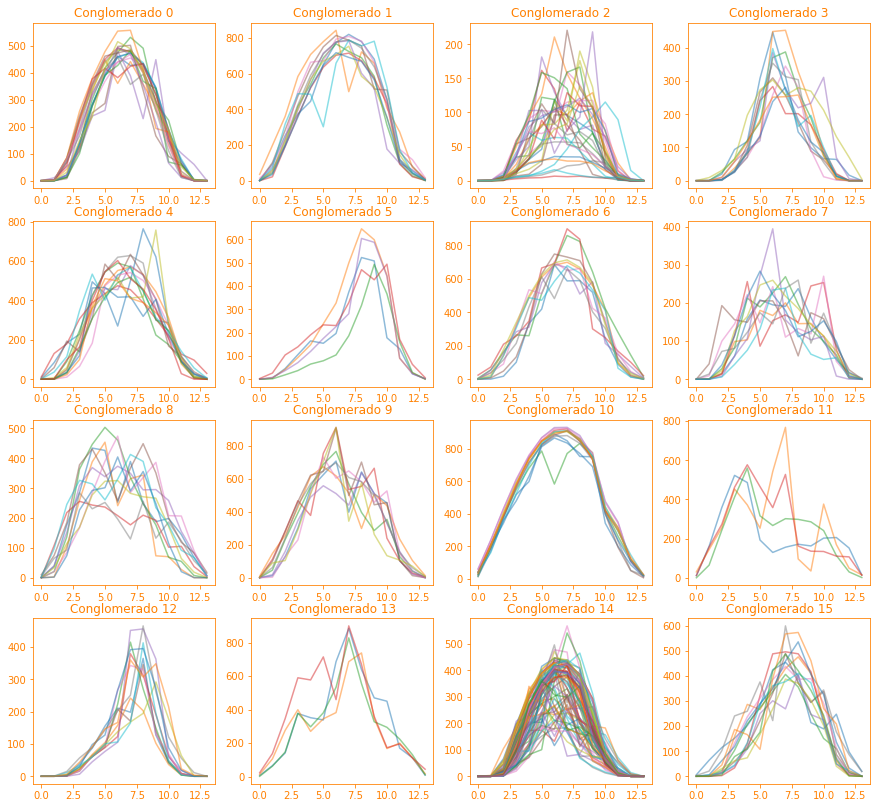

In [18]:
print('X_train (GaussianMixture)')
print_patrones(list_series=X_train,list_categorias=gm_pred_train,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_gm_train')

X_test (GaussianMixture)


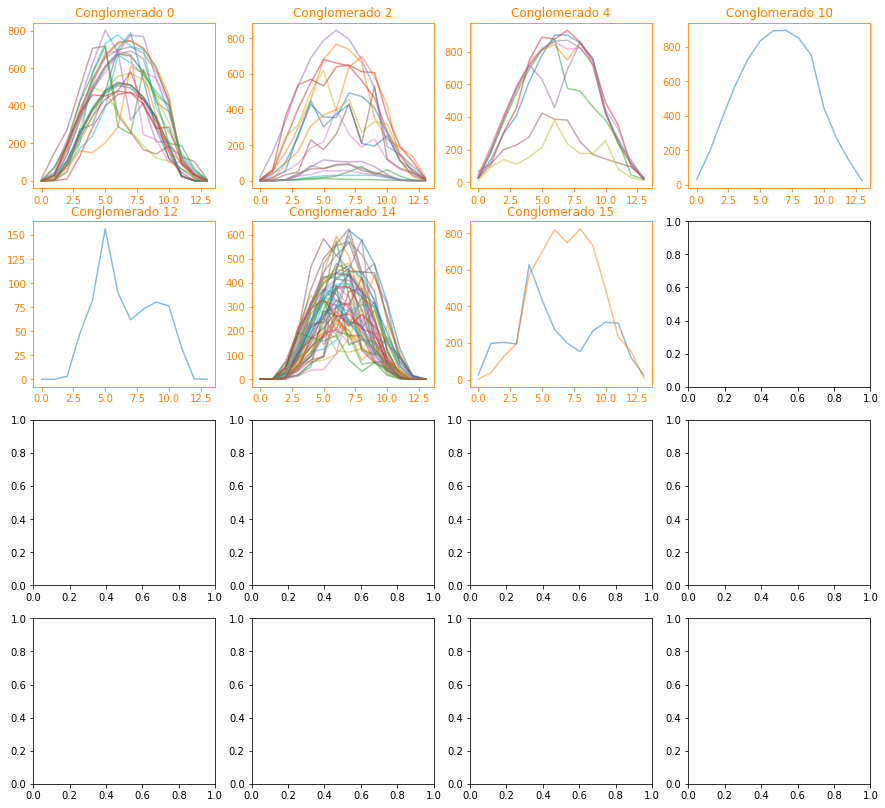

In [19]:
print('X_test (GaussianMixture)')
print_patrones(list_series=X_test,list_categorias=gm_pred,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_gm_test')

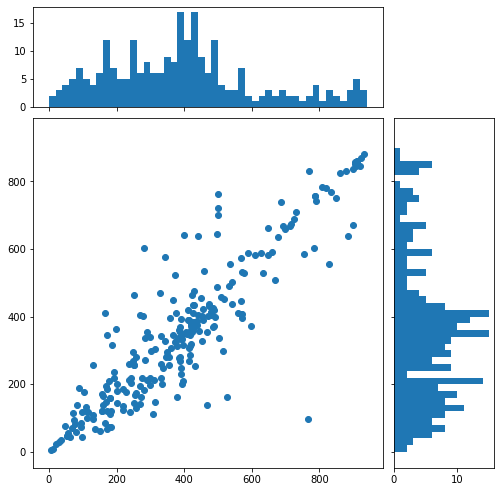

In [20]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    # the scatter plot:
    ax.scatter(x, y)
    # now determine nice limits by hand:
    binwidth = 20
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(X_train[:,7],X_train[:,8], ax, ax_histx, ax_histy)

plt.show()

# **KNN**

In [21]:
#https://scikit-learn.org/stable/modules/neighbors.html#classification
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(X_train)  #['auto','ball_tree','kd_tree','brute'].
distances, indices = nbrs.kneighbors(X_train)
print(distances, indices)
nbrs.kneighbors_graph(X_train).toarray()

[[  0.          88.10341459 116.65316704 ... 141.42528649 145.85883396
  149.78539277]
 [  0.         131.32089094 139.28036167 ... 155.94432761 157.94377345
  160.77635604]
 [  0.         183.52590409 236.57474328 ... 284.70446859 303.87047271
  318.1742124 ]
 ...
 [  0.         138.9228343  202.30380687 ... 259.03916426 268.52037473
  275.57985587]
 [  0.         467.31927822 471.09150268 ... 544.05065761 548.48167774
  556.89818016]
 [  0.         183.3106683  189.2455555  ... 216.13438534 219.68569342
  222.61656684]] [[  0 182 127 ... 185 152 131]
 [  1 214   6 ... 105  18 243]
 [  2 160  50 ...  58  70 195]
 ...
 [249 181 221 ...  86 186 201]
 [250 195  57 ... 176  84  70]
 [251 211  44 ... 126  23 242]]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, labels)
knn_pred_train = knn.predict(X_train)
knn_pred       = knn.predict(X_test)
print('knn_pred', knn_pred)
print('knn_pred_train',knn_pred_train )
print(knn.score(X_test,knn_pred))

knn_pred [12  7 13  5  0  4  2 13 13  5 13  7  4 13 13  0  2  5 12 14  9  5 13  0
  5  2  6  1 12 14  4 12  2  5 13  4  2  5  4  4  2  2  0 10 12 12 12  0
  2  2  1 10  7  5 12 12 13  9  5  2  5  0  1  4 12  0  1  9  2 13  1  9
  2  0 10  4  4  5 12  9  5  0 14 10  1  5  2  7  1  5 12 13 10  2 11 13
 13  6  7 11 11  2  7  3  2  4  2 13]
knn_pred_train [ 0 12  5 13  1  9 12  2  2  4  4  3  4  2  2  2 13  0 12 12  9  4 12 10
  5 15  5  6  2  2  5  4  1  2  4  4 13  5  9  7 12  4 13  3 13  9  4 12
 10 12  5 12  0  0 15 11  7  5  5  0 12  4  0  2  0  2  4 13  2  1  5 12
  4  2 13  4  2 13  2 13  5  2 13  2  1  7  6  2 13  5  6  1  5  2 15  7
  9 12 13  6 14  5  2  2 10  2  1 12  7  5  2  4  4  0  1 13 12  0 14 12
 12  2  6  1  2 11 13  0  4  4 12  0  1  5  2  6  4  4  1 12  5  5 14 14
  0  2 13  2  2 10  5 12  0  6  5 14  1 13  2 11  5  9  6  2 10 11 12 12
 15 11 12  4  4 10 12  0  5  2  0  4 13  6  0 12  8 12 11  2 13 11  7  2
  2  7  2  5  4  0  1  4  9  2 12  5 13  7 14  5  4  5  2 13 1

X_train (KNN)


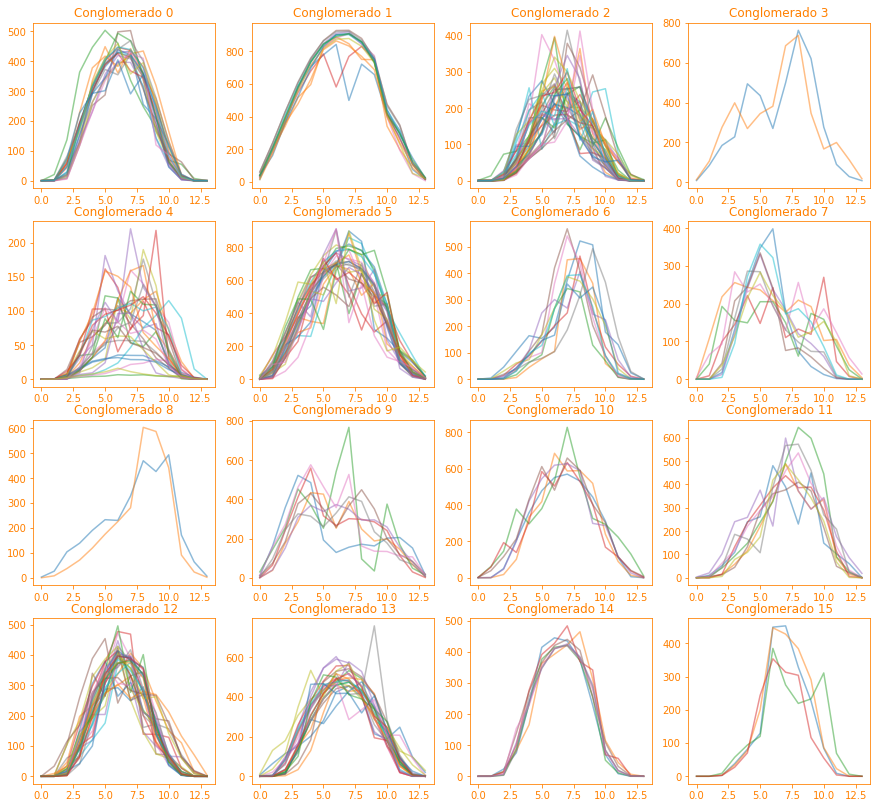

In [23]:
print('X_train (KNN)')
print_patrones(list_series=X_train,list_categorias=knn_pred_train,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_knn_train')

X_test (KNN)


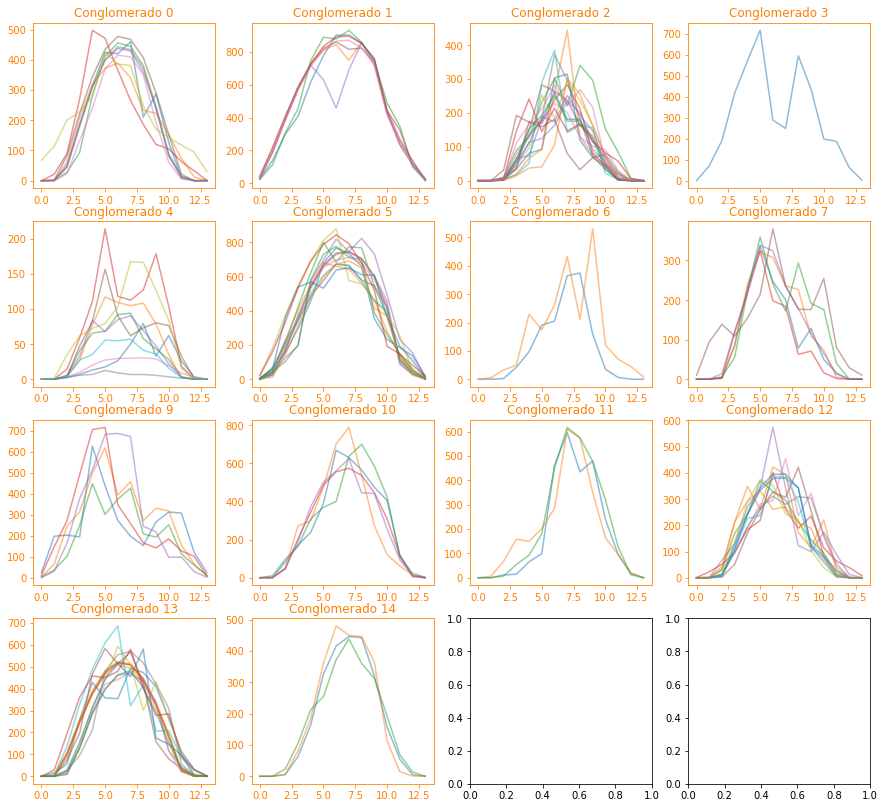

In [24]:
print('X_test (KNN)')
print_patrones(list_series=X_test,list_categorias=knn_pred,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_knn_test')

# **Radiación solar diaria**

In [25]:
#https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
model=ARIMA(x_total,order=(1,0,1))
model_fit=model.fit()

forecast_dx = model_fit.predict(start=550,end=650,dynamic=False)

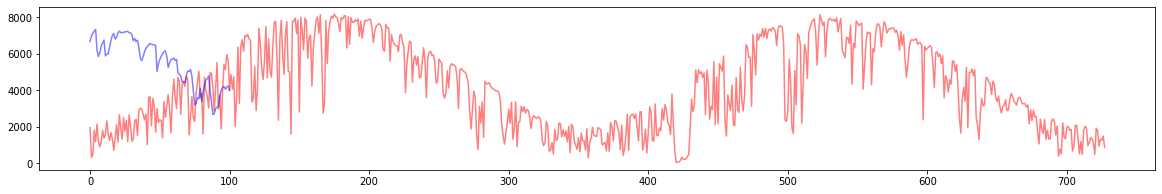

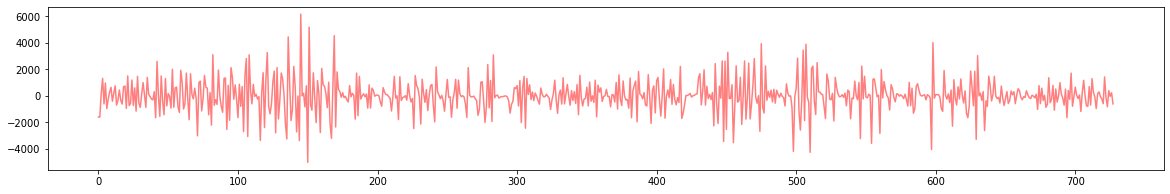

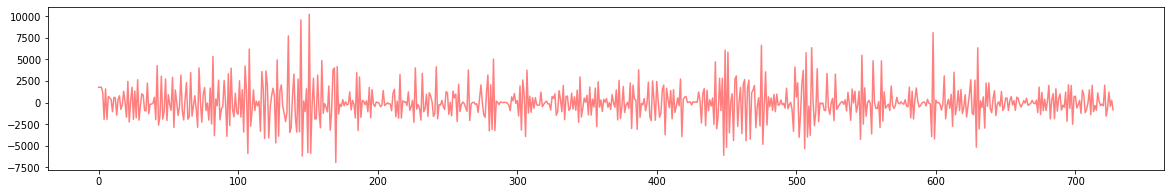

<Figure size 1440x216 with 0 Axes>

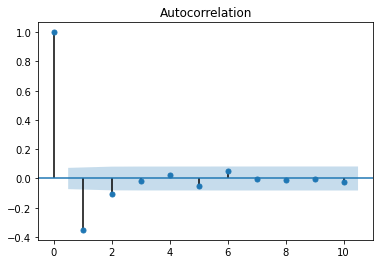

<Figure size 1440x216 with 0 Axes>

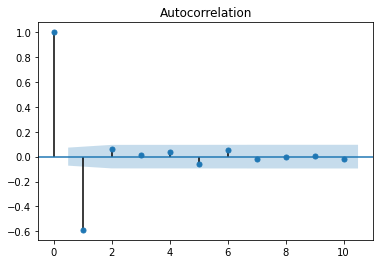

<Figure size 1440x216 with 0 Axes>

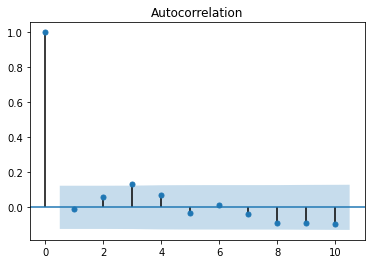

<Figure size 1440x216 with 0 Axes>

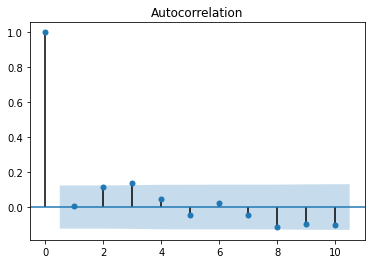

<Figure size 1584x360 with 0 Axes>

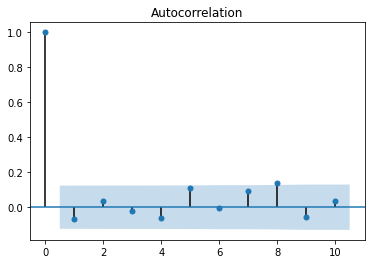

<Figure size 1440x216 with 0 Axes>

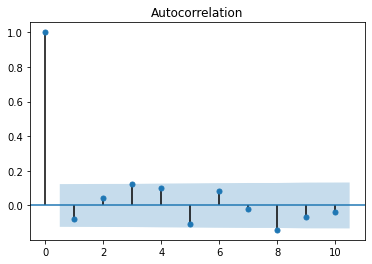

In [26]:
plt.figure(figsize=(20, 3))
plt.plot(x_total,alpha=.5,color='red')
plt.plot(forecast_dx,alpha=.5,color='blue')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(dx_total,alpha=.5,color='red')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(ddx_total,alpha=.5,color='red')
plt.show()

plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(dx_total, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(ddx_total, lags=10)
plt.show()


plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(y_kmeans_train, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(glvq_pred_train, lags=10)
plt.show()
plt.figure(figsize=(22, 5))
sm.graphics.tsa.plot_acf(gm_pred_train, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(knn_pred_train, lags=10)
plt.show()

In [27]:
model=ARIMA(gm_pred_train  ,order=(1,0,1))
model_fit=model.fit()

forecast_dx = model_fit.predict(start=200,end=300,dynamic=True)
print(forecast_dx)

[8.7671229  8.18951777 8.37466325 8.31531674 8.33433966 8.32824205
 8.33019658 8.32957008 8.3297709  8.32970653 8.32972716 8.32972054
 8.32972266 8.32972199 8.3297222  8.32972213 8.32972216 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215
 8.32972215 8.32972215 8.32972215 8.32972215 8.32972215 8.3297

clusering (ventanas de diferente tamaño)

*   dynamic time warping (euclidiana)
*   matrix profile (  )
*   Abol de decisión o random forrest
*   standariza
*   piecewise agregation aproximation
*   sax simbolic aproximation 

https://matrixprofile.docs.matrixprofile.org/
https://matrixprofile.docs.matrixprofile.org/examples/Hierarchical_Clustering_Accelerometer_Walk_Stand_etc.html

# **A continuación intentaremos hacer regresión local**
(sin suerte)

In [28]:
# Calcula los pesos y regresa una matriz diagonal con los pesos
def get_weight_exp(xo, X, kK): 
## k    : tamanio del vecindario (bandwidth)
## X    : Regresores
## xo   : punto donde se desea hacer la predicción.
    n = X.shape[0]             ## numero de datos
    weight = np.mat(np.eye(n)) ## Matriz de pesos identidad W.    
  # Cálculo de pesos para todos los datos de entrenamiento xi.
    for i in range(n): 
        xi = X[i] 
        d = (-2 * kK * kK) 
        weight[i, i] = np.exp(np.dot((xi-xo), (xi-xo).T)/d)
    return weight

def local_regression(X,Y,W,Xo):
    # W     --> Matriz diagonal de pesos
    # X     --> Regresores
    # xo    --> punto donde se desea hacer la predicción.
    Xt   = X.T  # Calcula transpuesta de X
    A    = np.matmul(Xt, np.matmul(W,X)) 
    A    = np.linalg.inv(A) # Calcula inversa de A
    B    = np.matmul(Xt, np.matmul(W,Y))
    beta = np.matmul(A,B)
    prediccion = np.matmul(Xo,beta)
    return prediccion

In [29]:
X   = sm.add_constant(neighbors.T)
X_2 = sm.add_constant(neighbors2.T)
y   = apor[n-v:n]
y_real = apor[n-v+12:n+12]

k = 0 # Tamanio del vecindario
kmin = 1
kmax = 5
Y_local_list = []
Y_local      = []
aux = 0

for i in range(X.shape[0]):
    k = kmin
    flag = True
    while(flag==True):
        try:
            xo = X[[i]]
            W = get_weight_exp(xo, X, k)
            pred = local_regression(X, Y, W, xo)
            Y_local.append(pred.item(0))
            aux = pred.item(0)
        except:
            print("Sorry! Singular matrix found in position i=",str(i),"k=", k)
            k = k + 1
            if(k>kmax):                
                flag = False
                Y_local.append(0)
        else:
            flag = False 
            
Y_local_list.append(Y_local)
print(Y_local_list)

Sorry! Singular matrix found in position i= 0 k= 1
Sorry! Singular matrix found in position i= 0 k= 2
Sorry! Singular matrix found in position i= 0 k= 3
Sorry! Singular matrix found in position i= 0 k= 4
Sorry! Singular matrix found in position i= 0 k= 5
Sorry! Singular matrix found in position i= 1 k= 1
Sorry! Singular matrix found in position i= 1 k= 2
Sorry! Singular matrix found in position i= 1 k= 3
Sorry! Singular matrix found in position i= 1 k= 4
Sorry! Singular matrix found in position i= 1 k= 5
Sorry! Singular matrix found in position i= 2 k= 1
Sorry! Singular matrix found in position i= 2 k= 2
Sorry! Singular matrix found in position i= 2 k= 3
Sorry! Singular matrix found in position i= 2 k= 4
Sorry! Singular matrix found in position i= 2 k= 5
Sorry! Singular matrix found in position i= 3 k= 1
Sorry! Singular matrix found in position i= 3 k= 2
Sorry! Singular matrix found in position i= 3 k= 3
Sorry! Singular matrix found in position i= 3 k= 4
Sorry! Singular matrix found in